# Welcome to this Rhyme project "Statistical Visualization" on Coursera Labs.

In this project, you will learn practically how to create plot and graphic visualizations that are useful for your own data science projects.

We will go through 5 tasks to implement our project:

Task 1: Understanding the importance of Data Visualization techniques in Data Science with an overview of the whole project (This first recorded non-technical task isn't included in the Jupyter notebook).

Task 2: Learning Practical Basic Statistics.

Task 3: Learning Statistical Visualization with Seaborn.

Task 4: Learning Statistical Visualization with Plotly.

Task 5: Learning Statistical Visualization with Matplotlib.

# Task 2: Basic Statistics

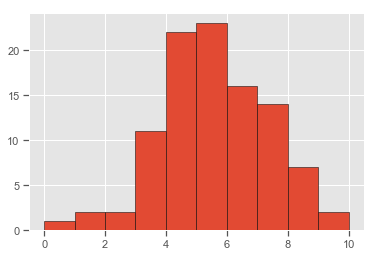

In [27]:
# Let’s create a dataset to work with and plot a histogram to visualise
import numpy as np
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

np.random.seed(1)
data = np.round(np.random.normal(5, 2, 100))
plt.hist(data, bins=10, range=(0,10), edgecolor='black')
plt.show()

In [29]:
# Measures of Central Tendency

# Calculating the mean
mean = np.mean(data)
mean

5.1

In [30]:
# Measures of Central Tendency

# Calculating the median
np.median(data)

5.0

In [31]:
# Measures of Central Tendency

# Calculating the mode
mode = stats.mode(data)

print("The modal value is {} with a count of {}".format(mode.mode[0], mode.count[0]))

The modal value is 5.0 with a count of 23


In [32]:
# The range gives a measure of how spread apart the values are.

# Calculating the Range
np.ptp(data)

9.0

In [33]:
# Variance is a measure of how variable the data is

# Calculating the Variance
np.var(data)

3.07

In [34]:
# The variance can get very large for large data sets and so we will often use the standard deviation,
# which is the square root of the variance

# Calculating the Standard Deviation
np.std(data)

1.752141546793523

In [35]:
# The standard error of the mean (SE of the mean) estimates the variability
#between sample means that you would obtain if you took multiple samples from the same population.
# The standard error of the mean estimates the variability between samples
# whereas the standard deviation measures the variability within a single sample.

# Calculating the Standard Error
stats.sem(data)

0.1760968512214259

# Task 3: Statistical Visualization with Seaborn

Timeseries plot with error bands

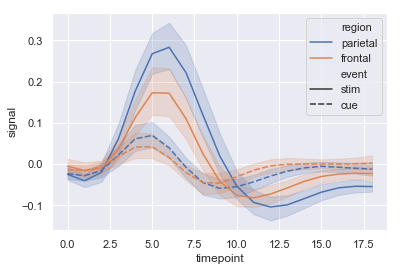

In [2]:
import seaborn as sns
sns.set(style="darkgrid")

# Load an example dataset with long-form data
fmri = sns.load_dataset("fmri")

# Plot the responses for different events and regions
sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

Plotting with date data

C:\Users\husien\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


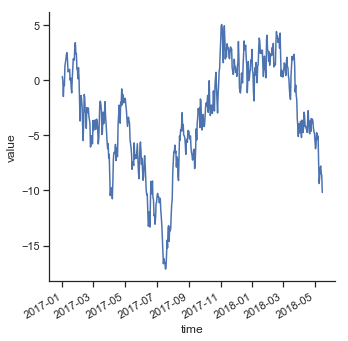

In [8]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

Scatterplot Matrix

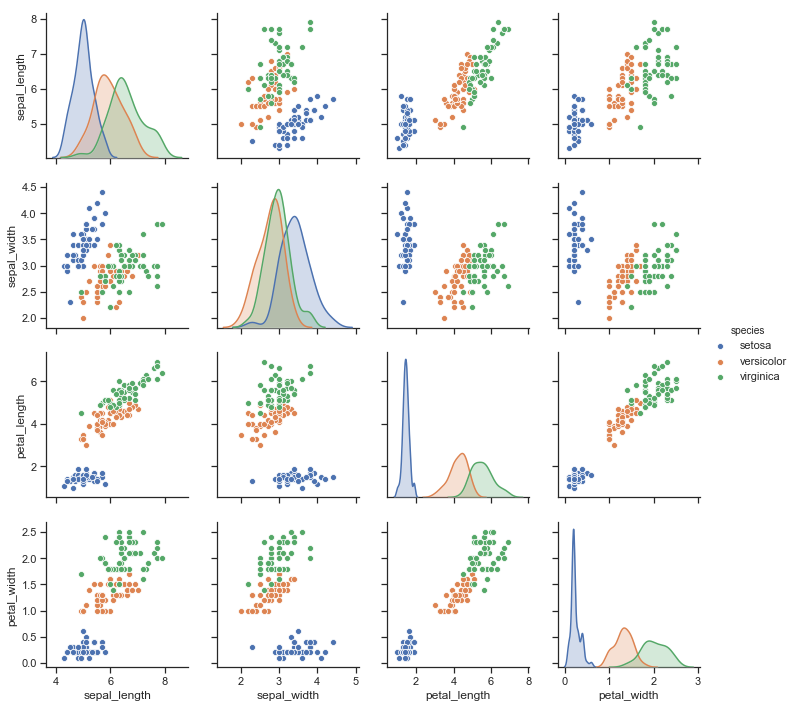

In [3]:
import seaborn as sns
sns.set(style="ticks")

df = sns.load_dataset("iris")
sns.pairplot(df, hue="species")

Scatterplot with categorical and numerical semantics

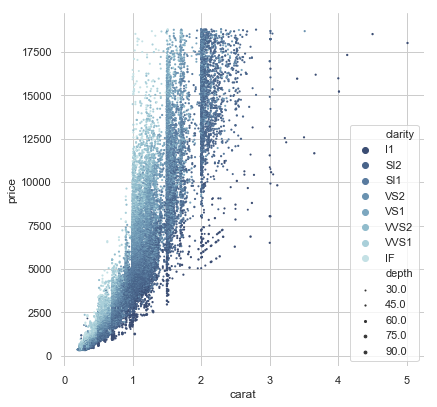

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Load the example diamonds dataset
diamonds = sns.load_dataset("diamonds")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

Horizontal boxplot with observations

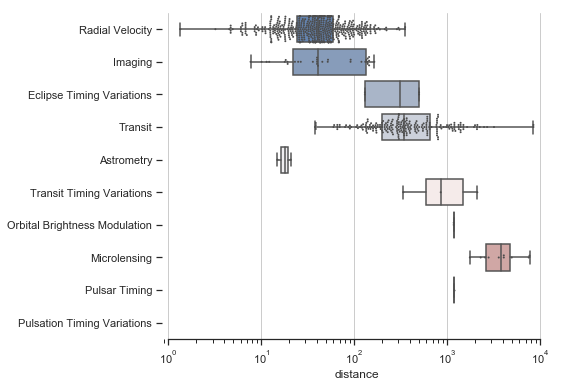

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

# Load the example planets dataset
planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], palette="vlag")

# Add in points to show each observation
sns.swarmplot(x="distance", y="method", data=planets,
              size=2, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

Linear regression with marginal distributions

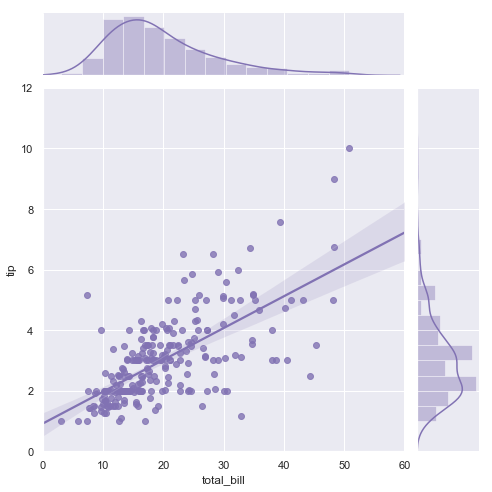

In [6]:
import seaborn as sns
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot("total_bill", "tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

Plotting on a large number of facets

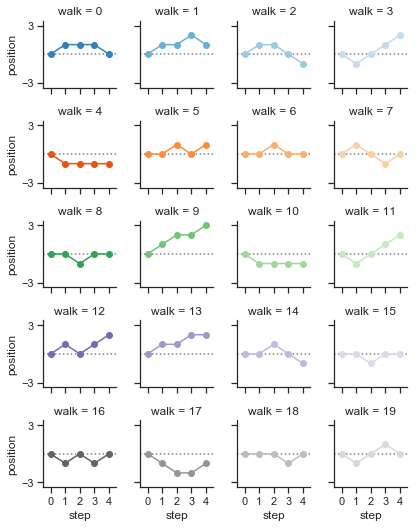

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="ticks")

# Create a dataset with many short random walks
rs = np.random.RandomState(4)
pos = rs.randint(-1, 2, (20, 5)).cumsum(axis=1)
pos -= pos[:, 0, np.newaxis]
step = np.tile(range(5), 20)
walk = np.repeat(range(20), 5)
df = pd.DataFrame(np.c_[pos.flat, step, walk],
                  columns=["position", "step", "walk"])

# Initialize a grid of plots with an Axes for each walk
grid = sns.FacetGrid(df, col="walk", hue="walk", palette="tab20c",
                     col_wrap=4, height=1.5)

# Draw a horizontal line to show the starting point
grid.map(plt.axhline, y=0, ls=":", c=".5")

# Draw a line plot to show the trajectory of each random walk
grid.map(plt.plot, "step", "position", marker="o")

# Adjust the tick positions and labels
grid.set(xticks=np.arange(5), yticks=[-3, 3],
         xlim=(-.5, 4.5), ylim=(-3.5, 3.5))

# Adjust the arrangement of the plots
grid.fig.tight_layout(w_pad=1)

# Task 4: Statistical Visualization with Plotly

Creating Box Plots

In [12]:
# Basic Box Plot
import plotly.graph_objects as go
import numpy as np
np.random.seed(1)

y0 = np.random.randn(50) - 1
y1 = np.random.randn(50) + 1

fig = go.Figure()
fig.add_trace(go.Box(y=y0))
fig.add_trace(go.Box(y=y1))

fig.show()

# Grouped Box Plots
import plotly.graph_objects as go

x = ['day 1', 'day 1', 'day 1', 'day 1', 'day 1', 'day 1',
     'day 2', 'day 2', 'day 2', 'day 2', 'day 2', 'day 2']

fig = go.Figure()

fig.add_trace(go.Box(
    y=[0.2, 0.2, 0.6, 1.0, 0.5, 0.4, 0.2, 0.7, 0.9, 0.1, 0.5, 0.3],
    x=x,
    name='kale',
    marker_color='#3D9970'
))
fig.add_trace(go.Box(
    y=[0.6, 0.7, 0.3, 0.6, 0.0, 0.5, 0.7, 0.9, 0.5, 0.8, 0.7, 0.2],
    x=x,
    name='radishes',
    marker_color='#FF4136'
))
fig.add_trace(go.Box(
    y=[0.1, 0.3, 0.1, 0.9, 0.6, 0.6, 0.9, 1.0, 0.3, 0.6, 0.8, 0.5],
    x=x,
    name='carrots',
    marker_color='#FF851B'
))

fig.update_layout(
    yaxis_title='normalized moisture',
    boxmode='group'
# group together boxes of the different traces for each value of x
)
fig.show()

Creating Histograms

In [14]:
# Basic Histogram
import plotly.graph_objects as go

import numpy as np
np.random.seed(1)

x = np.random.randn(500)

fig = go.Figure(data=[go.Histogram(x=x)])
fig.show()

# Overlaid Histogram
import plotly.graph_objects as go

import numpy as np

x0 = np.random.randn(500)
# Add 1 to shift the mean of the Gaussian distribution
x1 = np.random.randn(500) + 1

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0))
fig.add_trace(go.Histogram(x=x1))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

Creating Dist Plots

In [15]:
# Basic Distplot
import plotly.figure_factory as ff
import numpy as np
np.random.seed(1)

x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show()

# Plot Multiple Datasets
import plotly.figure_factory as ff
import numpy as np

# Add histogram data
x1 = np.random.randn(200) - 2
x2 = np.random.randn(200)
x3 = np.random.randn(200) + 2
x4 = np.random.randn(200) + 4

# Group data together
hist_data = [x1, x2, x3, x4]

group_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels, bin_size=.2)
fig.show()

Creating Density Heatmaps

In [16]:
# Basic Density Heatmap
import plotly.express as px
df = px.data.tips()

fig = px.density_heatmap(df, x="total_bill", y="tip")
fig.show()

# Multiple Density Heatmap
import plotly.express as px
df = px.data.tips()

fig = px.density_heatmap(df, x="total_bill", y="tip", facet_row="sex", facet_col="smoker")
fig.show()

Creating Violin Plots

In [17]:
# Basic Violin Plot
import plotly.express as px

df = px.data.tips()
fig = px.violin(df, y="total_bill")
fig.show()

# Multiple Violin Plot
import plotly.express as px

df = px.data.tips()
fig = px.violin(df, y="tip", x="smoker", color="sex", box=True, points="all",
          hover_data=df.columns)
fig.show()


Creating Linear and Non-Linear Trendlines

In [18]:
# Linear Trendlines
import plotly.express as px

df = px.data.tips()
fig = px.scatter(df, x="total_bill", y="tip", trendline="ols")
fig.show()

# Non-Linear Trendlines
import plotly.express as px

df = px.data.gapminder().query("year == 2007")
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent", trendline="lowess")
fig.show()

Creating Scatterplot Matrix

In [19]:
# Basic Scatterplot Matrix
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df)
fig.show()

# Styled Scatterplot Matrix
import plotly.express as px
df = px.data.iris()
fig = px.scatter_matrix(df,
    dimensions=["sepal_width", "sepal_length", "petal_width", "petal_length"],
    color="species", symbol="species",
    title="Scatter matrix of iris data set",
    labels={col:col.replace('_', ' ') for col in df.columns}) # remove underscore
fig.update_traces(diagonal_visible=False)
fig.show()

# Task 5: Statistical Visualization with Matplotlib

Creating Boxplots with Custom fill colors

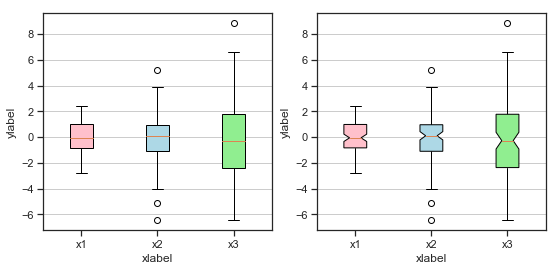

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Random test data
np.random.seed(123)
all_data = [np.random.normal(0, std, 100) for std in range(1, 4)]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# rectangular box plot
bplot1 = axes[0].boxplot(all_data,
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# notch shape box plot
bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # notch shape
                         vert=True,   # vertical box aligmnent
                         patch_artist=True)   # fill with color

# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y+1 for y in range(len(all_data))], )
    ax.set_xlabel('xlabel')
    ax.set_ylabel('ylabel')

# add x-tick labels
plt.setp(axes, xticks=[y+1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])

plt.show()

Creating Error Bars

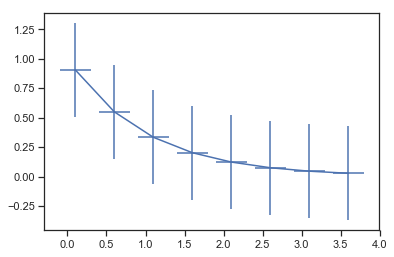

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

fig, ax = plt.subplots()
ax.errorbar(x, y, xerr=0.2, yerr=0.4)
plt.show()

Creating histograms for cumulative distribution

C:\Users\husien\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.

C:\Users\husien\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning:

scipy.stats.norm.pdf

C:\Users\husien\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



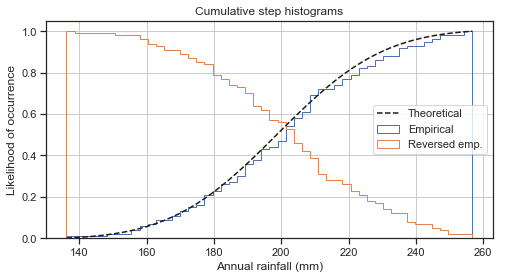

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

np.random.seed(0)

mu = 200
sigma = 25
n_bins = 50
x = np.random.normal(mu, sigma, size=100)

fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(x, n_bins, normed=1, histtype='step',
                           cumulative=True, label='Empirical')

# Add a line showing the expected distribution.
y = mlab.normpdf(bins, mu, sigma).cumsum()
y /= y[-1]

ax.plot(bins, y, 'k--', linewidth=1.5, label='Theoretical')

# Overlay a reversed cumulative histogram.
ax.hist(x, bins=bins, normed=1, histtype='step', cumulative=-1,
        label='Reversed emp.')

# tidy up the figure
ax.grid(True)
ax.legend(loc='right')
ax.set_title('Cumulative step histograms')
ax.set_xlabel('Annual rainfall (mm)')
ax.set_ylabel('Likelihood of occurrence')

plt.show()

Creating Violin Plots

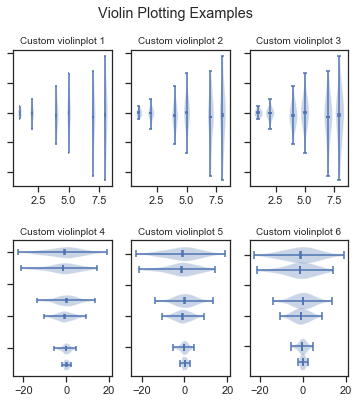

In [26]:
import random
import numpy as np
import matplotlib.pyplot as plt

# fake data
fs = 10  # fontsize
pos = [1, 2, 4, 5, 7, 8]
data = [np.random.normal(0, std, size=100) for std in pos]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6))

axes[0, 0].violinplot(data, pos, points=20, widths=0.3,
                      showmeans=True, showextrema=True, showmedians=True)
axes[0, 0].set_title('Custom violinplot 1', fontsize=fs)

axes[0, 1].violinplot(data, pos, points=40, widths=0.5,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[0, 1].set_title('Custom violinplot 2', fontsize=fs)

axes[0, 2].violinplot(data, pos, points=60, widths=0.7, showmeans=True,
                      showextrema=True, showmedians=True, bw_method=0.5)
axes[0, 2].set_title('Custom violinplot 3', fontsize=fs)

axes[1, 0].violinplot(data, pos, points=80, vert=False, widths=0.7,
                      showmeans=True, showextrema=True, showmedians=True)
axes[1, 0].set_title('Custom violinplot 4', fontsize=fs)

axes[1, 1].violinplot(data, pos, points=100, vert=False, widths=0.9,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method='silverman')
axes[1, 1].set_title('Custom violinplot 5', fontsize=fs)

axes[1, 2].violinplot(data, pos, points=200, vert=False, widths=1.1,
                      showmeans=True, showextrema=True, showmedians=True,
                      bw_method=0.5)
axes[1, 2].set_title('Custom violinplot 6', fontsize=fs)

for ax in axes.flatten():
    ax.set_yticklabels([])

fig.suptitle("Violin Plotting Examples")
fig.subplots_adjust(hspace=0.4)
plt.show()

# Congratulations! You are now able to create amazing plots and visualize any type of data in your own Machine Learning Projects!¶